In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Week 1: Introduction

In [3]:
model = keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])
model.compile(optimizer = "sgd", loss = "mean_squared_error")

2022-09-14 00:19:05.977673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-14 00:19:05.977974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-14 00:19:05.978134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-14 00:19:05.978304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-14 00:19:05.978386: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [8]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [9]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 449ms/step - loss: 46.3992
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 36.8849
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 29.3917
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 23.4888
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 18.8371
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 15.1701
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 12.2778
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 9.9953
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 8.1927
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 6.7677
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 5.6399
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 4.7462
Epoch 13/500
1/1 [==============================] 

In [11]:
model.predict([10.0])

1/1 [==============================] - 0s 80ms/step


array([[18.976892]], dtype=float32)

# Week 2: object recognition & Callbacks

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_images[0].shape

(28, 28)

In [9]:
np.set_printoptions(linewidth = 200)
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [10]:
# Affects Accuracy
train_images =  train_images / 255.0
test_images =  test_images / 255.0

In [17]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(128, activation = tf.nn.softmax),
])

In [18]:
model.compile(optimizer= tf.optimizers.Adam(), loss = tf.losses.sparse_categorical_crossentropy, metrics = ["accuracy"])

In [19]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5273 - accuracy: 0.8206
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3905 - accuracy: 0.8599
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3499 - accuracy: 0.8734


In [20]:
with tf.device("CPU"):
    model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3241 - accuracy: 0.8827
Epoch 2/3
  78/1875 [>.............................] - ETA: 9s - loss: 0.2907 - accuracy: 0.8878

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.8724


[0.3531327247619629, 0.8723999857902527]

## Callbacks

In [81]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get("loss") < 0.4):
            print("Cancel training, loss is low")
            self.model.stop_training = True


In [45]:
call_backs = myCallback()
model.fit(train_images, train_labels, epochs=10, callbacks = [call_backs])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3511 - accuracy: 0.8736


In [1]:
call_backs.on_epoch_end()

NameError: name 'call_backs' is not defined

## Learning Rate Scheduler

In [ ]:
# increasing learning_rate per epoch
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10 ** (epoch / 20))
model.fit(train_images, train_labels, epochs=10, callbacks = [lr_schedule])

# then, plot the loss vs learning_rate, choose the best value

# Week3: CNNs

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu", input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax),
])

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [87]:
model.compile(optimizer= tf.optimizers.Adam(), loss = tf.losses.sparse_categorical_crossentropy, metrics = ["accuracy"])

In [94]:
call_backs = myCallback()
histroy = model.fit(train_images, train_labels, epochs=5, callbacks = [call_backs])

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2820 - accuracy: 0.8958


## Visualizing layers

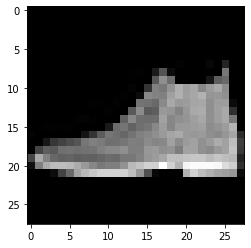

In [58]:
plt.imshow(test_images[0], cmap="gray")

In [23]:
first_img = 0
second_img = 23
third_img = 28
conv_num = 1

In [90]:
# make the layers as the outputs of the model
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [42]:
activation_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0   

In [79]:
activation_model.output

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

In [47]:
f1 = activation_model.predict(test_images[1].reshape(1,28,28,1))

1/1 [==============================] - 0s 22ms/step


In [92]:
f1[0].shape

(1, 26, 26, 64)

1/1 [==============================] - 0s 20ms/step


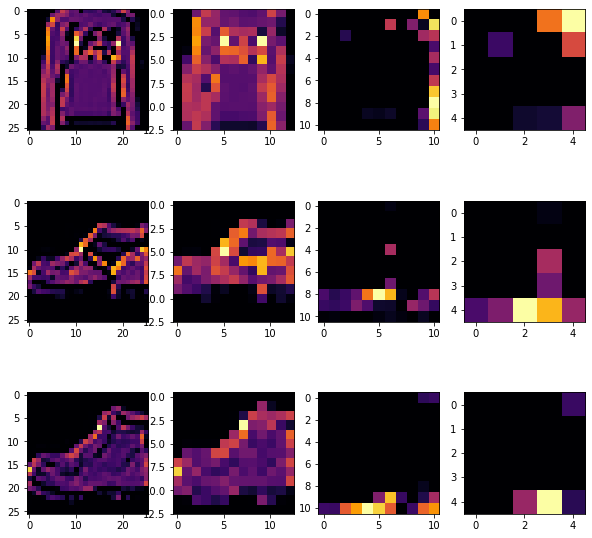

In [35]:
f, axes = plt.subplots(3,4, figsize = (10,10))

for i in range(0,4):
    f1 = activation_model.predict(test_images[1].reshape(1,28,28,1))[i];
    axes[0,i].imshow(f1[0,:,:,conv_num], cmap = "inferno");

    f2 = activation_model.predict(test_images[second_img].reshape(1,28,28,1))[i];
    axes[1,i].imshow(f2[0,:,:,conv_num], cmap = "inferno");

    f3 = activation_model.predict(test_images[third_img].reshape(1,28,28,1))[i];
    axes[2,i].imshow(f3[0,:,:,conv_num], cmap = "inferno");

# Week 4: Image Generator

In [6]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-09-14 18:21:42--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.37.240, 172.217.18.48, 172.217.18.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.37.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  1.79MB/s    in 90s     

2022-09-14 18:23:13 (1.58 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [7]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [13]:
# Do the same for validation data
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human/",
    # set target size to 150 to compact data , but it will overfit
    target_size =(300,300),
    batch_size = 128,
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.


## Convnet

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activationb='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-09-14 18:26:45.408325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-14 18:26:45.480034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-14 18:26:45.480625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-14 18:26:45.482448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
tf.keras.losses.bi

In [18]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer= tf.keras.optimizers.RMSprop(learning_rate = 0.001), metrics=["accuracy"])

In [24]:
# if validation, you will get val loss and accuracy too
model.fit(
    train_generator,
    # when the training set has no fixed size
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1
    
    # if validation
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/15
8/8 [==============================] - 11s 1s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2/15
8/8 [==============================] - 10s 1s/step - loss: 9.0153e-04 - accuracy: 1.0000
Epoch 3/15
8/8 [==============================] - 11s 1s/step - loss: 5.0639e-04 - accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 11s 1s/step - loss: 2.3855e-04 - accuracy: 1.0000
Epoch 5/15
8/8 [==============================] - 10s 1s/step - loss: 1.0798e-04 - accuracy: 1.0000
Epoch 6/15
8/8 [==============================] - 11s 1s/step - loss: 0.7409 - accuracy: 0.9248
Epoch 7/15
8/8 [==============================] - 10s 1s/step - loss: 0.0344 - accuracy: 0.9889
Epoch 8/15
8/8 [==============================] - 11s 1s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 9/15
8/8 [==============================] - 10s 1s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/15
8/8 [==============================] - 10s 1s/step - loss: 5.5991e-04 - accuracy: 1.0000
Epoch 11/15
8/8 [==

In [25]:
# predicting an image
image = tf.keras.preprocessing.image.load_img("Horse.png", target_size = (300,300))
image = tf.keras.preprocessing.image.img_to_array(image) / 255
image = image[None, :]

In [49]:
model.predict(image)

1/1 [==============================] - 0s 459ms/step


array([[0.]], dtype=float32)

## Compacting data